# COMPSCI 371D Homework 8

## Part 1: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('trivial.pickle', 'rb') as file:
    trivial = pickle.load(file)

### Problem 1.1

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def evaluate(h, train, test, description):
    def accuracy(predictor, s):
        sx, sy = s['x'], s['y']
        return predictor.score(sx, sy) * 100

    performance = {
        'description': description,
        'training accuracy': accuracy(h, train),
        'test accuracy': accuracy(h, test)
    }
    f = '{:s}: training accuracy is {:.2f} percent,' +\
        '\ntest accuracy is {:.2f} percent'
    print(f.format(description, performance['training accuracy'],
                   performance['test accuracy']))
    return performance

In [3]:
def experiment(data_set, classifier_name, classifier, hyper_parameters, folds=15, display=False):
    train, test = data_set['train'], data_set['test']
    c = GridSearchCV(classifier, hyper_parameters, scoring='accuracy', cv=folds, iid=False)
    h = c.fit(train['x'], train['y'])
    parm_string = ', '.join(['{} = {}'.format(key, h.best_params_[key])
                             for key in hyper_parameters.keys()])
    description = '{} with {}'.format(classifier_name, parm_string)
    if display:
        show_data(h.best_estimator_, train, description)
    evaluate(h.best_estimator_, train, test, description)

In [4]:
def plot_contourf(x, X, Y):
    yy = np.linspace(min(x[:,1]), max(x[:,1]), int((max(x[:,1])-min(x[:,1]))/.01))
    XX, YY = np.meshgrid(X,yy)
    Z = []
    for r in range(len(YY)):
        temp = []
        for c in range(len(YY[0])):
            if Y[c] > YY[r][c]:
                temp.append(-1)
            else:
                temp.append(1)
        Z.append(temp)
    plt.contourf(XX, YY, Z, alpha = .3, colors=['red','blue'])

In [5]:
def plot_scatter(x, y, y_h):
    m = abs(y-y_h)
    color = np.array(['blue' if c == 1 else 'red' for c in y_h])
    plt.scatter(x[:,0][m==2], x[:,1][m==2], s=25, marker='v', edgecolors=color[m==2], facecolors='none')
    plt.scatter(x[:,0][m==0], x[:,1][m==0], s=25, marker='o', edgecolors=color[m==0], facecolors='none')

In [6]:
def plot_CT(h, a, w, x, X):
    yy = np.linspace(min(x[:,1]), max(x[:,1]), int((max(x[:,1])-min(x[:,1]))/.01))
    YY, XX = np.meshgrid(yy, X)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = h.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    h_y = h.support_vectors_
    color = ['blue' if h_y[:,1][c] > a * h_y[:,0][c] - (h.intercept_[0]) / w[1] else 'red' for c in range(len(h_y))]
    plt.scatter(h_y[:,0], h_y[:,1], s=25, c=color)
    print("#Support Vectors: ", len(h_y))

In [7]:
def show_data(h, data_set, description):
    fig = plt.figure(figsize=(8,10))
    x, y = data_set['x'], data_set['y']
    h.fit(x, y)
    y_h = h.predict(x)
    plot_scatter(x, y, y_h)
    if hasattr(h, 'support_'):
        if h.kernel is not 'linear':
            w = dual_coef_[0]
        else:
            w = h.coef_[0]
        a = -w[0] / w[1]
        X = np.linspace(min(x[:,0]), max(x[:,0]), int((max(x[:,0])-min(x[:,0]))/.01))
        Y = a * X - (h.intercept_[0]) / w[1]
        plot_CT(h, a, w, x, X)
    else:   
        w = h.coef_[0]
        a = -w[0] / w[1]
        X = np.linspace(min(x[:,0]), max(x[:,0]), int((max(x[:,0])-min(x[:,0]))/.01))
        Y = a * X - (h.intercept_[0]) / w[1]
        plt.plot(X, Y, 'black')
    plot_contourf(x, X, Y)
    t = plt.title(description)

#Support Vectors:  3
linear SVM with C = 1000.0: training accuracy is 100.00 percent,
test accuracy is 100.00 percent


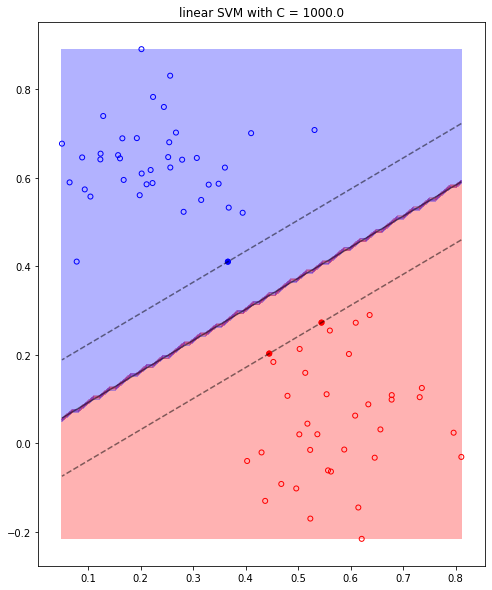

In [8]:
n_folds, display = 15, True
experiment(trivial, 'linear SVM', SVC(kernel='linear', gamma='auto'),
               hyper_parameters={'C': [1000.]}, folds=n_folds, display=display)

### Problem 1.2 (Exam-Style)

Since the training set is seperable, the support vectors will be the points that are of opposite classification that are closest to each other. The boundry is then placed in the middle of that space.

## Part 2: 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

with open('data.pickle', 'rb') as file:
    data = pickle.load(file)

### Problem 2.1

In [10]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]

In [11]:
n_folds, display = 15, True

Logistic Regression with C = 10.0: training accuracy is 63.60 percent,
test accuracy is 69.20 percent


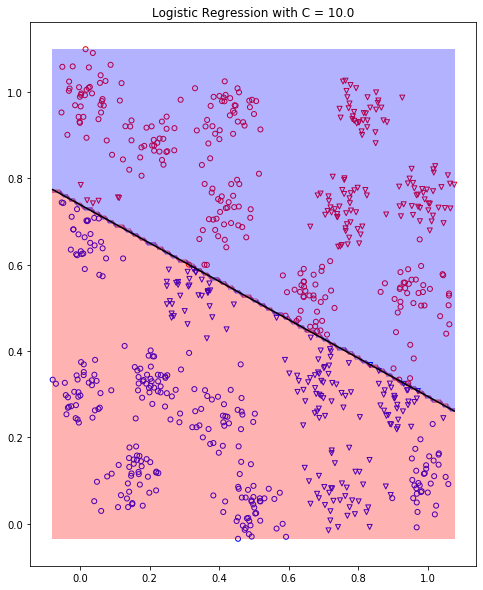

In [12]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(solver='lbfgs')
experiment(data, 'Logistic Regression', lrc, hyper_parameters={'C': c_values}, folds=n_folds, display=display)

### Problem 2.2

#Support Vectors:  614
linear SVM with C = 1.0: training accuracy is 71.33 percent,
test accuracy is 77.60 percent


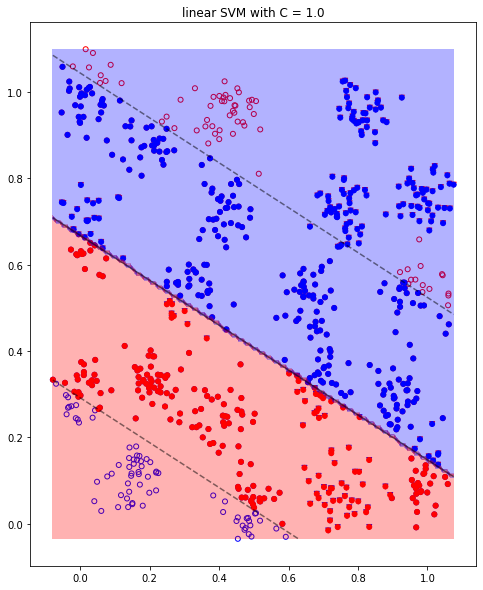

In [13]:
experiment(data, 'linear SVM', SVC(kernel='linear', gamma='auto'),
               hyper_parameters={'C': c_values}, folds=n_folds, display=display)

### Problem 2.3 (Exam-Style)

The number of support vectors needed to calculate to create the boundry increases a lot. 

### Problem 2.4

NameError: name 'dual_coef_' is not defined

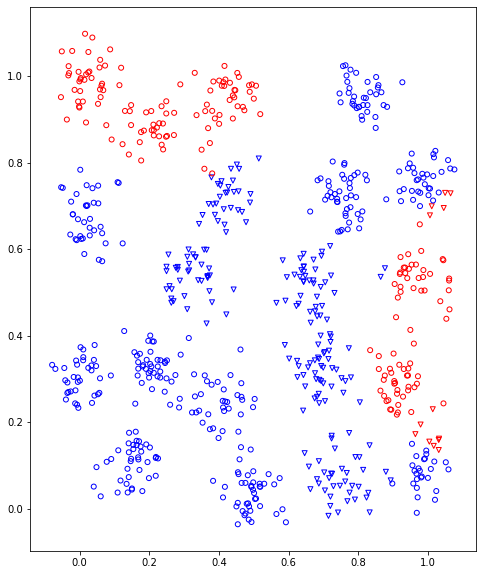

In [14]:
d = [2,3,4,5,6,7]
experiment(data, 'Poly SVM', SVC(kernel='poly', gamma='auto'),
               hyper_parameters={'C': c_values, 'degree':d}, folds=n_folds, display=display)

### Problem 2.5

Degree is the degree of the polynomial that the kernal is trying to fit.

### Problem 2.6

NameError: name 'dual_coef_' is not defined

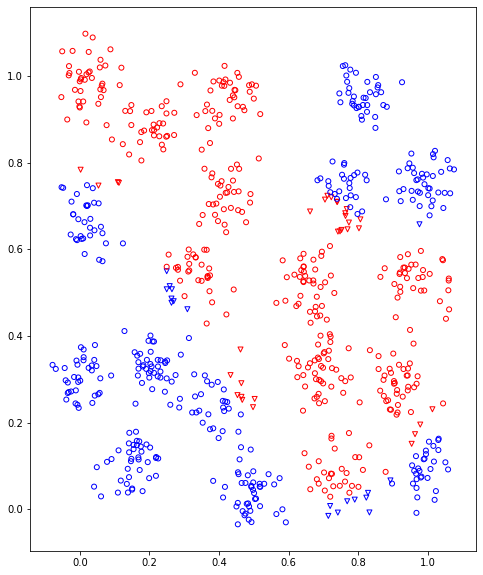

In [15]:
experiment(data, 'RBF SVM', SVC(kernel='rbf', gamma='auto'),
               hyper_parameters={'C': c_values, 'degree':d}, folds=n_folds, display=display)

### Problem 2.7 (Exam-Style)

### Problem 2.8 (Partially Exam-Style)

K-Nearest Neighbors because the 1-value data points appear in clumps near the bottom left and top right while the -1-value data points have a negative trend near the center.